<a href="https://colab.research.google.com/github/jacobw59/PhysicsI_Labs/blob/main/phy_122_errorprop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Stuff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt
from numpy import sum as Σ

π = np.pi

def Normal(x, μ, σ):
    ## a.k.a. Gaussian-function given: domain x and two parameters μ, σ
    return exp( - (x-μ)**2/(2*σ**2) ) / sqrt(2*π*σ**2)

def get_histogram(x, data, normalize=False):
    ### binary-search of sorted data for-all domains.
    ### let: N = len(data), then: O ~ (N + len(x))log(N)
    out = searchsorted( sort(data), x, side="right")
    if normalize:
        return x[1:] + (x[:-1] - x[1:])/2, (out[1:] - out[:-1])/len(data)
    return x[1:] + (x[:-1] - x[1:])/2, out[1:] - out[:-1]

def ExpectationValue(X):
    return np.sum(X)/len(X)

def RMSD(f1, f2):
    """
    Root-Mean-Square-Deviation
    compare two functions
    """
    return sqrt( (  Σ( (f1 - f2)**2 )  ) / (len(f1)) )

# Gaussian-Functions

Plot 3 Gaussian-functions using the above defintion

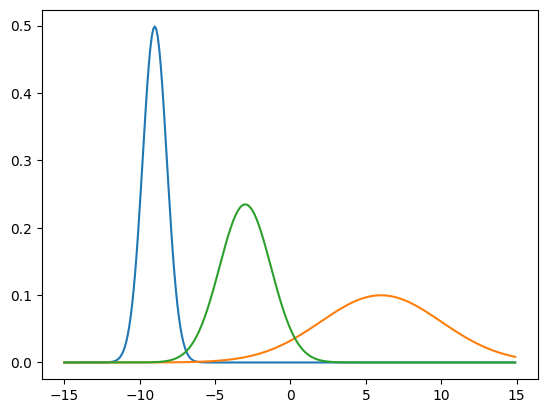

In [3]:
dx = 0.1
x  = arange(-15,15,dx)

plt.plot( x , Normal(x,-9.0, 0.8) )
plt.plot( x , Normal(x, 6.0, 4.0) )
plt.plot( x , Normal(x,-3.0, 1.7) )
plt.show()

# Random Variables

Let's use the following convention:


*   random-variables are denoted by CAPITAL letters (e.g. $A$, $B$, $F$, etc.)
*   arbitrarily-well-known-constants are denoted by lowercase letters (e.g. $a$, $b$, $f$, etc.)
*   variables are denoted by GΓΣΣΚ (Greek) letters (e.g. $\mu$, $\sigma$)




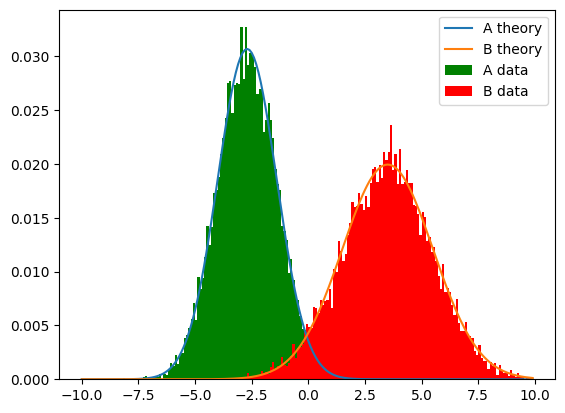

In [4]:
## Gaussian-function parameters
μ1 = -2.7; σ1 = 1.3
μ2 = 3.5;  σ2 = 2.0

## domain
dx = 0.1
x  = arange(-10,10,dx)

## define random variables
n = 10000 ## number of samples collected
A = random_normal(μ1, σ1, n) ## random variable A
B = random_normal(μ2, σ2, n) ## random variable B

## make histograms of the random variables
y, hA = get_histogram(x, A, normalize=True)
y, hB = get_histogram(x, B, normalize=True)

## plot histograms with overlied continuous representation
plt.bar(  y , hA, label="A data", color="g", width=0.10)
plt.bar(  y , hB, label="B data", color="r", width=0.10)
plt.plot( x , Normal(x, μ1, σ1) * dx, label="A theory")
plt.plot( x , Normal(x, μ2, σ2) * dx, label="B theory")
plt.legend()
plt.show()

# $F = aA$

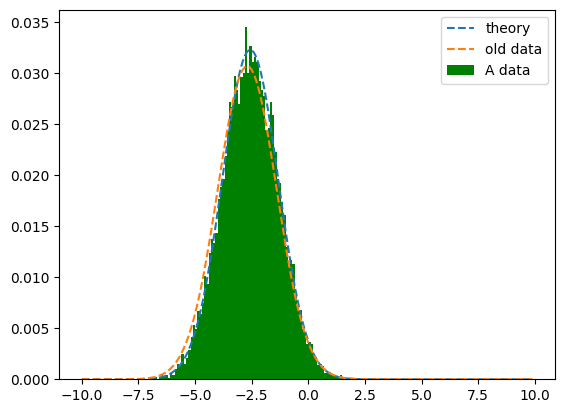

np.float64(0.0006540072526652239)

In [5]:
a = .95 ## constant

bins, hA = get_histogram(x, a*A, normalize=True)
σ     = sqrt(a**2 * σ1**2)
μ     = a * μ1

plt.bar(bins, hA, label="A data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ)   * dx, linestyle="dashed", label="theory")
plt.plot(x, Normal(x, μ1, σ1) * dx, linestyle="dashed", label="old data")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hA)

# $F = A + B$

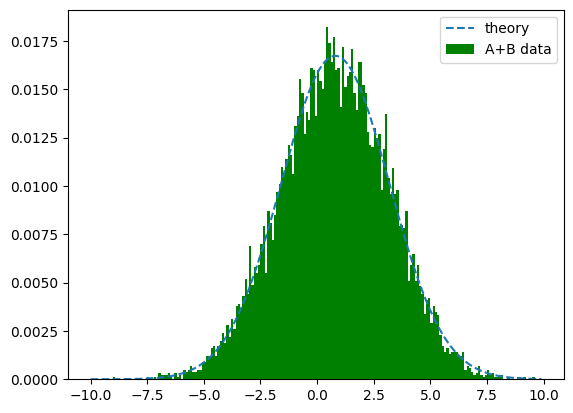

np.float64(0.0006883641170373988)

In [6]:
bins, hAB = get_histogram(x, A+B, normalize=True)

σ = sqrt(σ1**2 + σ2**2)
μ = μ1 + μ2

plt.bar( bins , hAB, label="A+B data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

# $F = aA + bB$

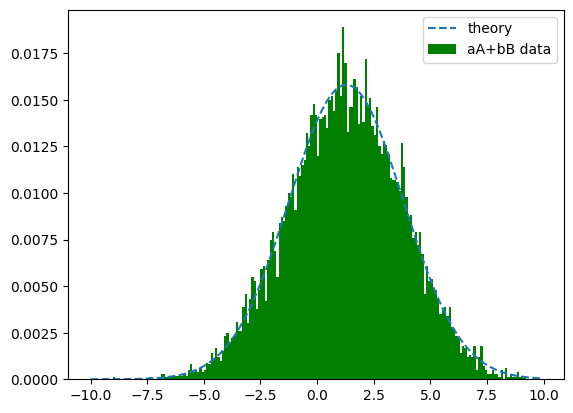

np.float64(0.0006915623678317023)

In [7]:
## constants considered
a = 0.95
b = 1.10

bins, hAB = get_histogram(x, a*A+b*B, normalize=True)
μ = a*μ1 + b*μ2
σ = sqrt( a**2 * σ1**2 + b**2 * σ2**2 )   ## error propagation here

## plot
plt.bar( bins , hAB, label="aA+bB data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

# $F = AB$

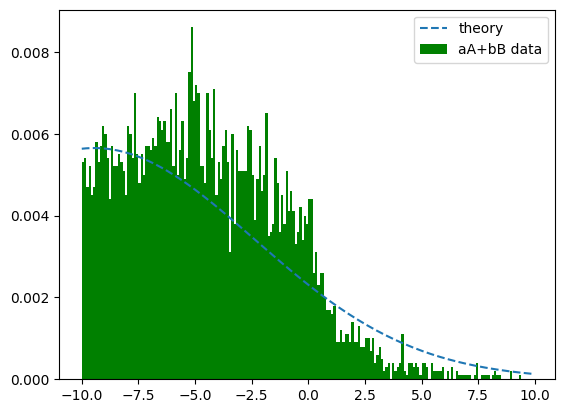

np.float64(0.0010571815924913814)

In [8]:
bins, hAB = get_histogram(x, A*B, normalize=True)
μ = μ1 * μ2
σ = sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.bar( bins , hAB, label="aA+bB data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

# DiY

### go to the table: https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae and implement one of the **non-linear** entries. Just like the previous 'experiments'. Note that you will be computing the relative error.

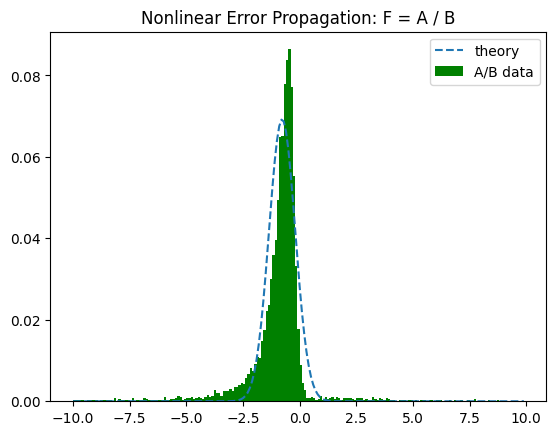

np.float64(0.0051666686238201545)

In [9]:
F = A / B
bins, hAB = get_histogram(x, F, normalize=True)

μ = μ1 / μ2
σ = abs(μ) * sqrt((σ1/μ1)**2 + (σ2/μ2)**2)  # relative error formula

plt.bar(bins, hAB, label="A/B data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.title("Nonlinear Error Propagation: F = A / B")
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

# Questions \& Conclusion

## Give a summary of what you did in this lab.

In this laboratory work, I have come to discover the arithmetic of random variables and how errors propagate through both linear and nonlinear operations. The first step in the research work is to realize Gaussian functions with their various means and standard deviations, then create random variables A and B based on these parameters. Finally, through histogram comparison and overlays of theory-based materials, I investigated how well sampled data fits with expected Gaussian behavior.

I tested and confirmed various operations like scalar multiplication (`aA`), addition (`A + B`), and linear combinations (`aA + bB`) with the uncertainty propagation formulas. In the nonlinear part of the experiment, I varied the product and division operations of two random variables using the above-published relative error formulas from the propagation of uncertainty theory. The histograms showed close matches to the theoretical Gaussian patterns, while low RMSD values signified the precision of the error models.

It deepens the knowledge and understanding of uncertainty, expectation values, and the Gaussian distribution, which is a relevant measure in real-life measurements.